<p align="center" style="font-size:50px;"><u><b>PREPROCESAMIENTO DE DATOS</b></u></p>

# <u>IMPORTACIÓN DE LOS DATOS POR REGIÓN<u>

## <u>MÁLAGA<u>

In [300]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.geocoders import Nominatim
import time
import os

In [226]:
# Leer los archivos CSV
df_listings_malaga = pd.read_csv(r'C:\Users\Victor\Documents\GitHub\Plataforma-Airbnb\Data\Malaga\listings.csv')
df_reviews_malaga = pd.read_csv(r'C:\Users\Victor\Documents\GitHub\Plataforma-Airbnb\Data\Malaga\reviews.csv')
df_listings_summary_malaga = pd.read_csv(r'C:\Users\Victor\Documents\GitHub\Plataforma-Airbnb\Data\Malaga\listings_summary.csv')

# Unir usando un merge: one-to-many
df_malaga = pd.merge(df_reviews_malaga, df_listings_malaga, how='left', left_on='listing_id', right_on='id')

# Mostrar el resultado
print(df_malaga.head())

   listing_id      id_x        date  reviewer_id reviewer_name  \
0     2380142  10672100  2014-03-02     12601833          José   
1     2380142  10963017  2014-03-15      9555058           Els   
2     2380142  11254456  2014-03-26      1237482        Elaine   
3     2380142  11489468  2014-04-05     11635565         Belén   
4     2380142  11522613  2014-04-06       546102          Mary   

                                            comments     id_y  \
0  Fali y Elisabeth son unos anfitriones increíbl...  2380142   
1  What a pleasure to stay at fali’s and elisabet...  2380142   
2  Elizabeth and Falli are excellent hosts. They ...  2380142   
3  Unos anfitriones estupendos, super atentos y e...  2380142   
4  La casa está muy bien ubicada, a dos pasos de ...  2380142   

                            listing_url       scrape_id last_scraped  ...  \
0  https://www.airbnb.com/rooms/2380142  20250328164700   2025-03-29  ...   
1  https://www.airbnb.com/rooms/2380142  20250328164700   

In [227]:
df_malaga.head(5)

,listing_id,id_x,date,reviewer_id,reviewer_name,comments,id_y,listing_url,scrape_id,last_scraped,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2380142,10672100,2014-03-02,12601833,José,Fali y Elisabeth son unos anfitriones increíbl...,2380142,https://www.airbnb.com/rooms/2380142,20250328164700,2025-03-29,...,4.72,4.47,4.59,VFT / 06609,f,14,1,13,0,2.17
1,2380142,10963017,2014-03-15,9555058,Els,What a pleasure to stay at fali’s and elisabet...,2380142,https://www.airbnb.com/rooms/2380142,20250328164700,2025-03-29,...,4.72,4.47,4.59,VFT / 06609,f,14,1,13,0,2.17
2,2380142,11254456,2014-03-26,1237482,Elaine,Elizabeth and Falli are excellent hosts. They ...,2380142,https://www.airbnb.com/rooms/2380142,20250328164700,2025-03-29,...,4.72,4.47,4.59,VFT / 06609,f,14,1,13,0,2.17
3,2380142,11489468,2014-04-05,11635565,Belén,"Unos anfitriones estupendos, super atentos y e...",2380142,https://www.airbnb.com/rooms/2380142,20250328164700,2025-03-29,...,4.72,4.47,4.59,VFT / 06609,f,14,1,13,0,2.17
4,2380142,11522613,2014-04-06,546102,Mary,"La casa está muy bien ubicada, a dos pasos de ...",2380142,https://www.airbnb.com/rooms/2380142,20250328164700,2025-03-29,...,4.72,4.47,4.59,VFT / 06609,f,14,1,13,0,2.17


In [228]:
df_malaga.columns

Index(['listing_id', 'id_x', 'date', 'reviewer_id', 'reviewer_name',
       'comments', 'id_y', 'listing_url', 'scrape_id', 'last_scraped',
       'source', 'name', 'description', 'neighborhood_overview', 'picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maxi

In [229]:
df_malaga.describe(include='all')  # Descripción de todas las columnas

,listing_id,id_x,date,reviewer_id,reviewer_name,comments,id_y,listing_url,scrape_id,last_scraped,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,4.457800e+05,4.457800e+05,445780,4.457800e+05,445779,445762,4.457800e+05,445780,4.457800e+05,445780,...,445780.000000,445780.000000,445780.000000,436990,445780,445780.000000,445780.000000,445780.000000,445780.000000,445780.000000
unique,NaN,NaN,4338,NaN,56380,430757,NaN,8454,NaN,4,...,NaN,NaN,NaN,6155,2,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,2024-08-25,NaN,David,.,NaN,https://www.airbnb.com/rooms/30141259,NaN,2025-03-29,...,NaN,NaN,NaN,Exempt,t,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,623,NaN,3114,1095,NaN,1027,NaN,391119,...,NaN,NaN,NaN,13902,252891,NaN,NaN,NaN,NaN,NaN
mean,2.338403e+17,7.160048e+17,NaN,1.915404e+08,NaN,NaN,2.338403e+17,NaN,2.025033e+13,NaN,...,4.856799,4.770594,4.689966,NaN,NaN,16.851350,15.441550,1.408789,0.000686,2.803425
std,3.959316e+17,4.861446e+17,NaN,1.739220e+08,NaN,NaN,3.959316e+17,NaN,0.000000e+00,NaN,...,0.148023,0.194242,0.189920,NaN,NaN,34.192752,34.140276,5.260799,0.064173,2.013525
min,9.603300e+04,4.756450e+05,NaN,1.400000e+01,NaN,NaN,9.603300e+04,NaN,2.025033e+13,NaN,...,1.000000,1.000000,1.000000,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.828179e+07,7.171011e+08,NaN,4.498551e+07,NaN,NaN,1.828179e+07,NaN,2.025033e+13,NaN,...,4.800000,4.680000,4.600000,NaN,NaN,1.000000,1.000000,0.000000,0.000000,1.360000
50%,3.377236e+07,8.535029e+17,NaN,1.319392e+08,NaN,NaN,3.377236e+07,NaN,2.025033e+13,NaN,...,4.900000,4.820000,4.720000,NaN,NaN,3.000000,2.000000,0.000000,0.000000,2.450000
75%,5.875055e+17,1.145526e+18,NaN,3.076426e+08,NaN,NaN,5.875055e+17,NaN,2.025033e+13,NaN,...,4.950000,4.910000,4.820000,NaN,NaN,12.000000,8.000000,0.000000,0.000000,3.800000


In [230]:
df_malaga.dtypes

listing_id                                        int64
id_x                                              int64
date                                             object
reviewer_id                                       int64
reviewer_name                                    object
                                                 ...   
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
Length: 85, dtype: object

## <u>MALLORCA<u>

In [231]:
# Leer los archivos CSV
df_listings_mallorca = pd.read_csv(r'C:\Users\Victor\Documents\GitHub\Plataforma-Airbnb\Data\Mallorca\listings.csv')
df_reviews_mallorca = pd.read_csv(r'C:\Users\Victor\Documents\GitHub\Plataforma-Airbnb\Data\Mallorca\reviews.csv')
df_listings_summary_mallorca = pd.read_csv(r'C:\Users\Victor\Documents\GitHub\Plataforma-Airbnb\Data\Mallorca\listings_summary.csv')

# Unir usando un merge: one-to-many
df_mallorca = pd.merge(df_reviews_mallorca, df_listings_mallorca, how='left', left_on='listing_id', right_on='id')

# Mostrar el resultado
print(df_mallorca.head())

C:\Users\Victor\AppData\Local\Temp\ipykernel_38260\1508412151.py:2: DtypeWarning: Columns (63,64) have mixed types. Specify dtype option on import or set low_memory=False.
  df_listings_mallorca = pd.read_csv(r'C:\Users\Victor\Documents\GitHub\Plataforma-Airbnb\Data\Mallorca\listings.csv')


   listing_id     id_x        date  reviewer_id reviewer_name  \
0       69998   881474  2012-01-24      1595616   Jean-Pierre   
1       69998  4007103  2013-04-02      3868130   Jo And Mike   
2       69998  4170371  2013-04-15      5730759     Elizabeth   
3       69998  4408459  2013-05-03      5921885          Jone   
4       69998  4485779  2013-05-07       810469        Andrea   

                                            comments   id_y  \
0  This place was charming! Lorenzo himself is a ...  69998   
1  We had a four night stay at this gorgeous apar...  69998   
2  Lor's apartment looks exactly like the picture...  69998   
3  Wonderful place! 10/10. Charming, spacious and...  69998   
4  My boyfriend and I, had a lovely stay at Loren...  69998   

                          listing_url       scrape_id last_scraped  ...  \
0  https://www.airbnb.com/rooms/69998  20250307145417   2025-03-10  ...   
1  https://www.airbnb.com/rooms/69998  20250307145417   2025-03-10  ...   
2  ht

In [232]:
df_mallorca.head(5)

,listing_id,id_x,date,reviewer_id,reviewer_name,comments,id_y,listing_url,scrape_id,last_scraped,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,69998,881474,2012-01-24,1595616,Jean-Pierre,This place was charming! Lorenzo himself is a ...,69998,https://www.airbnb.com/rooms/69998,20250307145417,2025-03-10,...,4.97,4.89,4.81,NaN,f,2,2,0,0,1.66
1,69998,4007103,2013-04-02,3868130,Jo And Mike,We had a four night stay at this gorgeous apar...,69998,https://www.airbnb.com/rooms/69998,20250307145417,2025-03-10,...,4.97,4.89,4.81,NaN,f,2,2,0,0,1.66
2,69998,4170371,2013-04-15,5730759,Elizabeth,Lor's apartment looks exactly like the picture...,69998,https://www.airbnb.com/rooms/69998,20250307145417,2025-03-10,...,4.97,4.89,4.81,NaN,f,2,2,0,0,1.66
3,69998,4408459,2013-05-03,5921885,Jone,"Wonderful place! 10/10. Charming, spacious and...",69998,https://www.airbnb.com/rooms/69998,20250307145417,2025-03-10,...,4.97,4.89,4.81,NaN,f,2,2,0,0,1.66
4,69998,4485779,2013-05-07,810469,Andrea,"My boyfriend and I, had a lovely stay at Loren...",69998,https://www.airbnb.com/rooms/69998,20250307145417,2025-03-10,...,4.97,4.89,4.81,NaN,f,2,2,0,0,1.66


In [233]:
df_mallorca.columns

Index(['listing_id', 'id_x', 'date', 'reviewer_id', 'reviewer_name',
       'comments', 'id_y', 'listing_url', 'scrape_id', 'last_scraped',
       'source', 'name', 'description', 'neighborhood_overview', 'picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maxi

In [234]:
df_mallorca.describe(include='all')  # Descripción de todas las columnas

,listing_id,id_x,date,reviewer_id,reviewer_name,comments,id_y,listing_url,scrape_id,last_scraped,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,3.708890e+05,3.708890e+05,370889,3.708890e+05,370889,370872,3.708890e+05,370889,3.708890e+05,370889,...,370889.000000,370889.000000,370889.000000,276438,370889,370889.000000,370889.000000,370889.000000,370889.000000,370889.000000
unique,NaN,NaN,4400,NaN,40281,363152,NaN,12154,NaN,6,...,NaN,NaN,NaN,7804,2,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,2024-09-14,NaN,David,.,NaN,https://www.airbnb.com/rooms/45538743,NaN,2025-03-10,...,NaN,NaN,NaN,TI/90,t,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,635,NaN,2535,718,NaN,2079,NaN,121790,...,NaN,NaN,NaN,3191,193295,NaN,NaN,NaN,NaN,NaN
mean,1.173163e+17,6.605096e+17,NaN,1.663645e+08,NaN,NaN,1.173163e+17,NaN,2.025031e+13,NaN,...,4.841855,4.752088,4.644727,NaN,NaN,33.651189,33.153798,0.442847,0.000024,2.024078
std,3.007142e+17,4.764086e+17,NaN,1.644339e+08,NaN,NaN,3.007142e+17,NaN,0.000000e+00,NaN,...,0.188622,0.199670,0.226373,NaN,NaN,116.426878,115.972496,1.289258,0.004926,4.555012
min,6.999800e+04,4.296730e+05,NaN,6.290000e+02,NaN,NaN,6.999800e+04,NaN,2.025031e+13,NaN,...,1.000000,1.000000,1.000000,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.203667e+07,6.551006e+08,NaN,3.294724e+07,NaN,NaN,1.203667e+07,NaN,2.025031e+13,NaN,...,4.780000,4.660000,4.550000,NaN,NaN,1.000000,1.000000,0.000000,0.000000,0.560000
50%,2.412910e+07,7.244892e+17,NaN,1.029763e+08,NaN,NaN,2.412910e+07,NaN,2.025031e+13,NaN,...,4.900000,4.800000,4.690000,NaN,NaN,2.000000,2.000000,0.000000,0.000000,1.050000
75%,4.726600e+07,1.125272e+18,NaN,2.564128e+08,NaN,NaN,4.726600e+07,NaN,2.025031e+13,NaN,...,4.960000,4.900000,4.790000,NaN,NaN,9.000000,9.000000,0.000000,0.000000,1.920000


In [235]:
df_mallorca.dtypes

listing_id                                        int64
id_x                                              int64
date                                             object
reviewer_id                                       int64
reviewer_name                                    object
                                                 ...   
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
Length: 85, dtype: object

## <u>VALENCIA<u>

In [236]:
# Leer los archivos CSV
df_listings_valencia = pd.read_csv(r'C:\Users\Victor\Documents\GitHub\Plataforma-Airbnb\Data\Valencia\listings.csv')
df_reviews_valencia = pd.read_csv(r'C:\Users\Victor\Documents\GitHub\Plataforma-Airbnb\Data\Valencia\reviews.csv')
df_listings_summary_valencia = pd.read_csv(r'C:\Users\Victor\Documents\GitHub\Plataforma-Airbnb\Data\Valencia\listings_summary.csv')

# Unir usando un merge: one-to-many
df_valencia = pd.merge(df_reviews_valencia, df_listings_valencia, how='left', left_on='listing_id', right_on='id')

# Mostrar el resultado
print(df_valencia.head())

   listing_id    id_x        date  reviewer_id    reviewer_name  \
0       48154  117554  2010-10-12       180238           Martha   
1       48154  145645  2010-11-28       204240             Mark   
2       48154  190572  2011-03-01       258565         Domenico   
3       48154  195081  2011-03-08       213496  Romina & Martín   
4       48154  218435  2011-04-05       340330            Jenna   

                                            comments   id_y  \
0  Toni's place was perfect in so many ways.  It ...  48154   
1  Awesome stay!! We'd recommend Toni's apartment...  48154   
2  really nice house in a wonderfull position! yo...  48154   
3  Apartamento muy agradable, al igual que su pro...  48154   
4  Was a great apartment, easy access to the site...  48154   

                          listing_url       scrape_id last_scraped  ...  \
0  https://www.airbnb.com/rooms/48154  20250315152909   2025-03-16  ...   
1  https://www.airbnb.com/rooms/48154  20250315152909   2025-03-16  

In [237]:
df_valencia.head(5)

,listing_id,id_x,date,reviewer_id,reviewer_name,comments,id_y,listing_url,scrape_id,last_scraped,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,48154,117554,2010-10-12,180238,Martha,Toni's place was perfect in so many ways. It ...,48154,https://www.airbnb.com/rooms/48154,20250315152909,2025-03-16,...,4.79,4.49,4.5,VT-41540-V,f,4,4,0,0,1.01
1,48154,145645,2010-11-28,204240,Mark,Awesome stay!! We'd recommend Toni's apartment...,48154,https://www.airbnb.com/rooms/48154,20250315152909,2025-03-16,...,4.79,4.49,4.5,VT-41540-V,f,4,4,0,0,1.01
2,48154,190572,2011-03-01,258565,Domenico,really nice house in a wonderfull position! yo...,48154,https://www.airbnb.com/rooms/48154,20250315152909,2025-03-16,...,4.79,4.49,4.5,VT-41540-V,f,4,4,0,0,1.01
3,48154,195081,2011-03-08,213496,Romina & Martín,"Apartamento muy agradable, al igual que su pro...",48154,https://www.airbnb.com/rooms/48154,20250315152909,2025-03-16,...,4.79,4.49,4.5,VT-41540-V,f,4,4,0,0,1.01
4,48154,218435,2011-04-05,340330,Jenna,"Was a great apartment, easy access to the site...",48154,https://www.airbnb.com/rooms/48154,20250315152909,2025-03-16,...,4.79,4.49,4.5,VT-41540-V,f,4,4,0,0,1.01


In [238]:
df_valencia.columns

Index(['listing_id', 'id_x', 'date', 'reviewer_id', 'reviewer_name',
       'comments', 'id_y', 'listing_url', 'scrape_id', 'last_scraped',
       'source', 'name', 'description', 'neighborhood_overview', 'picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maxi

In [239]:
df_valencia.describe(include='all')  # Descripción de todas las columnas

,listing_id,id_x,date,reviewer_id,reviewer_name,comments,id_y,listing_url,scrape_id,last_scraped,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,4.163890e+05,4.163890e+05,416389,4.163890e+05,416387,416369,4.163890e+05,416389,4.163890e+05,416389,...,416389.000000,416389.000000,416389.000000,228733,416389,416389.000000,416389.000000,416389.000000,416389.000000,416389.000000
unique,NaN,NaN,4483,NaN,51035,403566,NaN,7294,NaN,2,...,NaN,NaN,NaN,2110,2,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,2024-12-02,NaN,David,.,NaN,https://www.airbnb.com/rooms/681925,NaN,2025-03-15,...,NaN,NaN,NaN,HV-1401,f,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1209,NaN,2890,985,NaN,911,NaN,330395,...,NaN,NaN,NaN,2249,247871,NaN,NaN,NaN,NaN,NaN
mean,2.538555e+17,7.076737e+17,NaN,1.920193e+08,NaN,NaN,2.538555e+17,NaN,2.025032e+13,NaN,...,4.867857,4.760418,4.682701,NaN,NaN,6.967473,6.118533,0.843879,0.001153,2.850555
std,4.137974e+17,4.882867e+17,NaN,1.769136e+08,NaN,NaN,4.137974e+17,NaN,0.000000e+00,NaN,...,0.140778,0.202721,0.193333,NaN,NaN,13.878368,13.845157,2.423160,0.070191,1.733989
min,4.815400e+04,1.175540e+05,NaN,4.600000e+01,NaN,NaN,4.815400e+04,NaN,2.025032e+13,NaN,...,1.000000,1.000000,1.000000,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.630996e+07,6.485714e+08,NaN,4.211190e+07,NaN,NaN,1.630996e+07,NaN,2.025032e+13,NaN,...,4.830000,4.660000,4.600000,NaN,NaN,1.000000,1.000000,0.000000,0.000000,1.640000
50%,2.730775e+07,8.549374e+17,NaN,1.302678e+08,NaN,NaN,2.730775e+07,NaN,2.025032e+13,NaN,...,4.910000,4.810000,4.720000,NaN,NaN,2.000000,1.000000,0.000000,0.000000,2.630000
75%,6.282788e+17,1.144046e+18,NaN,3.130422e+08,NaN,NaN,6.282788e+17,NaN,2.025032e+13,NaN,...,4.950000,4.910000,4.820000,NaN,NaN,5.000000,4.000000,0.000000,0.000000,3.770000


In [240]:
df_valencia.dtypes

listing_id                                        int64
id_x                                              int64
date                                             object
reviewer_id                                       int64
reviewer_name                                    object
                                                 ...   
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
Length: 85, dtype: object

## <u>CREACIÓN DE LOS TRES DF DEFINITIVOS<u>

In [241]:
df_listings_summary_malaga['orignen'] = 'Malaga'
df_listings_summary_mallorca['orignen'] = 'Mallorca'
df_listings_summary_valencia['orignen'] = 'Valencia'

df_listings_summary = pd.concat([df_listings_summary_malaga, df_listings_summary_mallorca, df_listings_summary_valencia], ignore_index=True)


In [242]:
df_listings_summary.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,orignen
0,96033,"Bonito piso a 200m de la playa, El Palo (Málaga)",510467,Rafael,NaN,Este,36.720310,-4.356270,Entire home/apt,54.0,3,250,2025-03-01,1.79,1,259,39,VUT/MA/22043,Malaga
1,166473,Perfect Location In Malaga,793360,Fred,NaN,Este,36.720310,-4.361080,Private room,22.0,5,101,2025-02-11,0.61,5,301,4,NaN,Malaga
2,330760,Malaga Lodge Guesthouse Double room-shared bath.,1687526,Mayte,NaN,Centro,36.729786,-4.413462,Private room,51.0,1,60,2025-02-23,0.38,6,218,5,VFT/MA/12240,Malaga
3,340024,NEW APARTMENT IN MALAGA CENTER,1725690,Carlos,NaN,Centro,36.728130,-4.414220,Entire home/apt,65.0,3,301,2025-03-14,2.05,1,215,42,VFT/MA/02334,Malaga
4,358541,Casa La Maga - Apartment for happy people,1526932,Cristina,NaN,Centro,36.723740,-4.421300,Entire home/apt,86.0,2,388,2025-03-07,2.47,1,100,22,VFT/MA/02288,Malaga


In [243]:
df_listings_summary.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
orignen                            object
dtype: object

In [244]:
df_listings_summary.shape

(34872, 19)

In [245]:
df_reviews_malaga.dtypes

listing_id        int64
id                int64
date             object
reviewer_id       int64
reviewer_name    object
comments         object
dtype: object

In [246]:
df_malaga['origen'] = 'Málaga'
df_mallorca['origen'] = 'Mallorca'
df_valencia['origen'] = 'Valencia'

# Concatenar todos con la columna 'origen'
df_final_completo = pd.concat([df_malaga, df_mallorca, df_valencia], ignore_index=True)

In [247]:
print(df_final_completo)

                  listing_id                 id_x        date  reviewer_id  \
0                    2380142             10672100  2014-03-02     12601833   
1                    2380142             10963017  2014-03-15      9555058   
2                    2380142             11254456  2014-03-26      1237482   
3                    2380142             11489468  2014-04-05     11635565   
4                    2380142             11522613  2014-04-06       546102   
...                      ...                  ...         ...          ...   
1233053  1370501122252440425  1375377232821556483  2025-03-12    340748591   
1233054  1370501122252440425  1376019738537284631  2025-03-13    683743285   
1233055  1371661990103330192  1374542253666413710  2025-03-11    354018564   
1233056  1372894792136776314  1376816603384177868  2025-03-14    425877553   
1233057  1373519990109205218  1376087598138633086  2025-03-13    162430225   

        reviewer_name                                          

In [248]:
df_final_completo.head(5)

,listing_id,id_x,date,reviewer_id,reviewer_name,comments,id_y,listing_url,scrape_id,last_scraped,...,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,origen
0,2380142,10672100,2014-03-02,12601833,José,Fali y Elisabeth son unos anfitriones increíbl...,2380142,https://www.airbnb.com/rooms/2380142,20250328164700,2025-03-29,...,4.47,4.59,VFT / 06609,f,14,1,13,0,2.17,Málaga
1,2380142,10963017,2014-03-15,9555058,Els,What a pleasure to stay at fali’s and elisabet...,2380142,https://www.airbnb.com/rooms/2380142,20250328164700,2025-03-29,...,4.47,4.59,VFT / 06609,f,14,1,13,0,2.17,Málaga
2,2380142,11254456,2014-03-26,1237482,Elaine,Elizabeth and Falli are excellent hosts. They ...,2380142,https://www.airbnb.com/rooms/2380142,20250328164700,2025-03-29,...,4.47,4.59,VFT / 06609,f,14,1,13,0,2.17,Málaga
3,2380142,11489468,2014-04-05,11635565,Belén,"Unos anfitriones estupendos, super atentos y e...",2380142,https://www.airbnb.com/rooms/2380142,20250328164700,2025-03-29,...,4.47,4.59,VFT / 06609,f,14,1,13,0,2.17,Málaga
4,2380142,11522613,2014-04-06,546102,Mary,"La casa está muy bien ubicada, a dos pasos de ...",2380142,https://www.airbnb.com/rooms/2380142,20250328164700,2025-03-29,...,4.47,4.59,VFT / 06609,f,14,1,13,0,2.17,Málaga


In [249]:
df_final_completo.shape

(1233058, 86)

In [250]:
df_final_completo_dtypes = pd.DataFrame({
    'Column': df_final_completo.columns,
    'Dtype': df_final_completo.dtypes
})

df_final_completo_dtypes.head(60)

,Column,Dtype
listing_id,listing_id,int64
id_x,id_x,int64
date,date,object
reviewer_id,reviewer_id,int64
reviewer_name,reviewer_name,object
comments,comments,object
id_y,id_y,int64
listing_url,listing_url,object
scrape_id,scrape_id,int64
last_scraped,last_scraped,object


In [251]:
df_final_completo_dtypes.tail(26)

,Column,Dtype
availability_365,availability_365,int64
calendar_last_scraped,calendar_last_scraped,object
number_of_reviews,number_of_reviews,int64
number_of_reviews_ltm,number_of_reviews_ltm,int64
number_of_reviews_l30d,number_of_reviews_l30d,int64
availability_eoy,availability_eoy,int64
number_of_reviews_ly,number_of_reviews_ly,int64
estimated_occupancy_l365d,estimated_occupancy_l365d,int64
estimated_revenue_l365d,estimated_revenue_l365d,float64
first_review,first_review,object


In [252]:
df_listings_malaga['origen'] = 'Málaga'
df_listings_mallorca['origen'] = 'Mallorca'
df_listings_valencia['origen'] = 'Valencia'

# Concatenar todos con la columna 'origen'
df_listings_final = pd.concat([df_malaga, df_mallorca, df_valencia], ignore_index=True)

In [253]:
print(df_listings_final)

                  listing_id                 id_x        date  reviewer_id  \
0                    2380142             10672100  2014-03-02     12601833   
1                    2380142             10963017  2014-03-15      9555058   
2                    2380142             11254456  2014-03-26      1237482   
3                    2380142             11489468  2014-04-05     11635565   
4                    2380142             11522613  2014-04-06       546102   
...                      ...                  ...         ...          ...   
1233053  1370501122252440425  1375377232821556483  2025-03-12    340748591   
1233054  1370501122252440425  1376019738537284631  2025-03-13    683743285   
1233055  1371661990103330192  1374542253666413710  2025-03-11    354018564   
1233056  1372894792136776314  1376816603384177868  2025-03-14    425877553   
1233057  1373519990109205218  1376087598138633086  2025-03-13    162430225   

        reviewer_name                                          

In [254]:
df_listings_final.shape

(1233058, 86)

In [255]:
df_listings_summary.shape

(34872, 19)

In [256]:
df_final_completo.shape

(1233058, 86)

## <u>TIPOS DE DATOS<u>

### df_final_completo

In [257]:
# --- 1. Convertir a datetime ---

datetime_cols = [
    'last_review', 'date', 'last_scraped',
    'host_since', 'calendar_last_scraped', 'first_review'
]

for col in datetime_cols:
    if col in df_final_completo.columns:
        df_final_completo[col] = pd.to_datetime(df_final_completo[col], errors='coerce')

# --- 2. Limpiar y convertir tasas (porcentajes tipo "95%") a int ---
percentage_cols = ['host_response_rate', 'host_acceptance_rate']

for col in percentage_cols:
    if col in df_final_completo.columns:
        df_final_completo[col] = (
            df_final_completo[col]
            .astype(str)
            .str.replace('%', '', regex=False)
            .str.strip()
            .replace('', pd.NA)
            .astype(float)
            .round()
            .astype('Int64')  # Entero que admite NaNs
        )

# --- 3. Convertir columnas numéricas a int con soporte para NaN ---
int_cols = [
    'host_listings_count', 'host_total_listings_count',
    'bedrooms', 'beds'
]

for col in int_cols:
    if col in df_final_completo.columns:
        df_final_completo[col] = pd.to_numeric(df_final_completo[col], errors='coerce').astype('Int64')

# --- 4. Convertir 'price' a float (eliminando símbolos como $ y ,) ---
if 'price' in df_final_completo.columns:
    df_final_completo['price'] = (
        df_final_completo['price']
        .astype(str)
        .str.replace(r'[$,]', '', regex=True)
        .str.strip()
        .replace('', pd.NA)
        .astype(float)
    )

### df_listings_summary

In [258]:
# --- 1. Convertir a datetime ---

datetime_cols = [
    'last_review', 'date', 'last_scraped',
    'host_since', 'calendar_last_scraped', 'first_review'
]

for col in datetime_cols:
    if col in df_listings_summary.columns:
        df_listings_summary[col] = pd.to_datetime(df_listings_summary[col], errors='coerce')

# --- 2. Limpiar y convertir tasas (porcentajes tipo "95%") a int ---
percentage_cols = ['host_response_rate', 'host_acceptance_rate']

for col in percentage_cols:
    if col in df_listings_summary.columns:
        df_listings_summary[col] = (
            df_listings_summary[col]
            .astype(str)
            .str.replace('%', '', regex=False)
            .str.strip()
            .replace('', pd.NA)
            .astype(float)
            .round()
            .astype('Int64')  # Entero que admite NaNs
        )

# --- 3. Convertir columnas numéricas a int con soporte para NaN ---
int_cols = [
    'host_listings_count', 'host_total_listings_count',
    'bedrooms', 'beds'
]

for col in int_cols:
    if col in df_listings_summary.columns:
        df_listings_summary[col] = pd.to_numeric(df_listings_summary[col], errors='coerce').astype('Int64')

# --- 4. Convertir 'price' a float (eliminando símbolos como $ y ,) ---
if 'price' in df_listings_summary.columns:
    df_listings_summary['price'] = (
        df_listings_summary['price']
        .astype(str)
        .str.replace(r'[$,]', '', regex=True)
        .str.strip()
        .replace('', pd.NA)
        .astype(float)
    )

In [259]:
df_listings_summary['last_review'] = pd.to_datetime(df_listings_summary['last_review'], errors='coerce')

In [260]:
df_listings_summary.dtypes

id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                       object
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                    float64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
number_of_reviews_ltm                      int64
license                                   object
orignen                                   object
dtype: object

## Comprobación duplicados

In [261]:
df_listings_summary.duplicated().sum()

np.int64(0)

In [262]:
df_final_completo.duplicated().sum()

np.int64(0)

## Comprobación nulos

### df_listings_summary

In [298]:
df_listings_summary.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
license                           0
orignen                           0
neighbourhood_origen              0
dtype: int64

In [299]:
df_listings_summary.isnull().sum() / len(df_listings_summary) * 100

id                                0.0
name                              0.0
host_id                           0.0
host_name                         0.0
neighbourhood_group               0.0
neighbourhood                     0.0
latitude                          0.0
longitude                         0.0
room_type                         0.0
price                             0.0
minimum_nights                    0.0
number_of_reviews                 0.0
last_review                       0.0
reviews_per_month                 0.0
calculated_host_listings_count    0.0
availability_365                  0.0
number_of_reviews_ltm             0.0
license                           0.0
orignen                           0.0
neighbourhood_origen              0.0
dtype: float64

<Axes: >

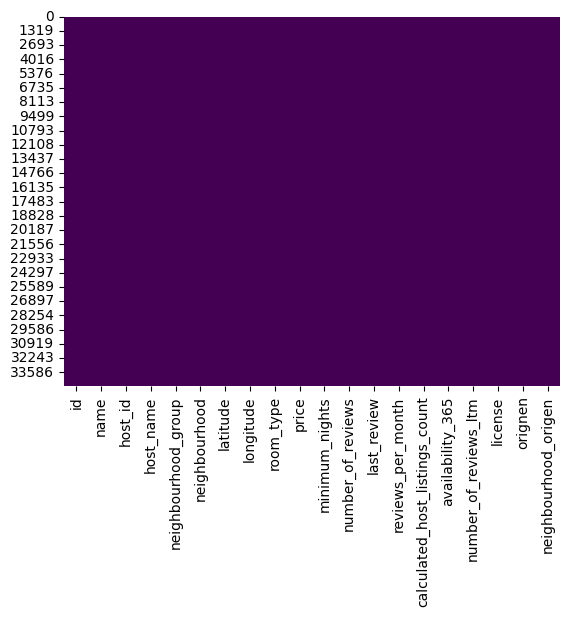

In [297]:
sns.heatmap(df_listings_summary.isnull(), cbar=False, cmap='viridis')

In [266]:
df_listings_summary['host_name'] = df_listings_summary['host_name'].fillna('Sin_nombre')
df_listings_summary['neighbourhood_group'] = df_listings_summary['neighbourhood_group'].fillna('Sin_grupo')
df_listings_summary['license'] = df_listings_summary['license'].fillna('Sin_licencia')

In [267]:
df_listings_summary.loc[
    df_listings_summary['number_of_reviews'] == 0, 
    'last_review'
] = 0000-00-00

C:\Users\Victor\AppData\Local\Temp\ipykernel_38260\2028912096.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  df_listings_summary.loc[


In [268]:
df_listings_summary.loc[
    df_listings_summary['number_of_reviews'] == 0, 
    'reviews_per_month'
] = 0

In [295]:
df_listings_summary = df_listings_summary.dropna(subset=['price'])
df_listings_summary['price'] = df_listings_summary['price'].astype(float)

In [296]:
df_listings_summary['price'].count()

np.int64(31890)

### df_final_completo

<Axes: >

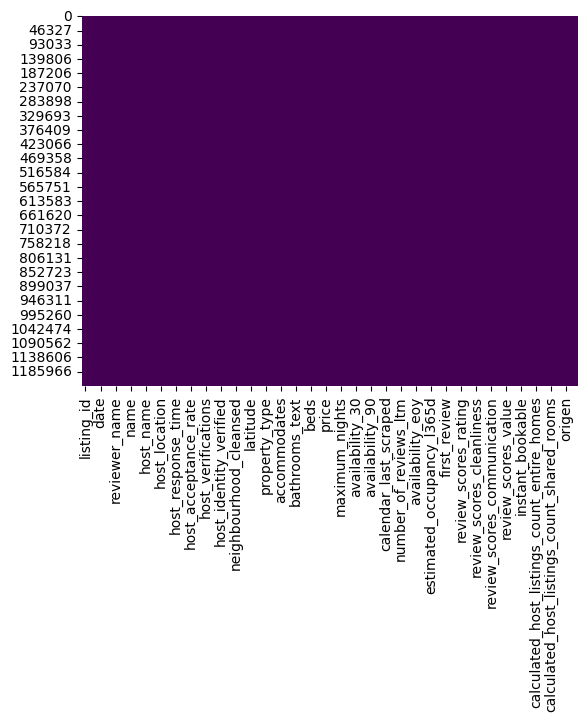

In [291]:
sns.heatmap(df_final_completo.isnull(), cbar=False, cmap='viridis')

In [289]:
nulos = df_final_completo.isna().sum()
nulos_filtrados = nulos[nulos > 0].sort_values(ascending=False)

print(nulos_filtrados)

Series([], dtype: int64)


In [290]:
nulos_porcentajes = (nulos_filtrados / len(df_final_completo) * 100).round(2)

print(nulos_porcentajes)

Series([], dtype: float64)


In [272]:
df_final_completo.loc[
    df_final_completo['number_of_reviews'] == 0, 
    'last_review'
] = 0000-00-00

C:\Users\Victor\AppData\Local\Temp\ipykernel_38260\331423530.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  df_final_completo.loc[


In [273]:
df_final_completo.loc[
    df_final_completo['number_of_reviews'] == 0, 
    'reviews_per_month'
] = 0

In [274]:
df_final_completo['host_name'] = df_final_completo['host_name'].fillna('Sin_nombre')
df_final_completo['license'] = df_final_completo['license'].fillna('Sin_licencia')
df_final_completo['host_neighbourhood'] = df_final_completo['host_neighbourhood'].fillna('Sin_barrio')
df_final_completo['neighbourhood'] = df_final_completo['neighbourhood'].fillna('Sin_barrio')
df_final_completo['neighborhood_overview'] = df_final_completo['neighborhood_overview'].fillna('Sin_barrio')
df_final_completo['neighbourhood_group_cleansed'] = df_final_completo['neighbourhood_group_cleansed'].fillna('Sin_grupo')
df_final_completo['host_about'] = df_final_completo['host_about'].fillna('Sin_descripción')
df_final_completo['host_location'] = df_final_completo['host_location'].fillna('Sin_localización') # Se podría buscar por latitud y longitud pero igual es demasiado trabajo para el poco tiempo que tenemos y es poco relevante para el análisis
df_final_completo['comments'] = df_final_completo['comments'].fillna('Sin_comentarios')
df_final_completo['reviewer_name'] = df_final_completo['reviewer_name'].fillna('Sin_revisor')
df_final_completo['description'] = df_final_completo['description'].fillna('Sin_descripción')

In [275]:
# Extraer el número inicial (puede incluir decimales como 5.5)
bathroom_num = df_final_completo['bathrooms_text'].str.extract(r'(\d+\.?\d*)')

# Convertir a float (puede contener NaN si no matchea nada)
bathroom_num = bathroom_num[0].astype(float)

# Rellenar los valores nulos de 'bathrooms' solo con los valores disponibles en 'bathrooms_text'
df_final_completo['bathrooms'] = df_final_completo['bathrooms'].fillna(bathroom_num)

In [276]:
df_final_completo['bathrooms_text'] = df_final_completo['bathrooms_text'].fillna(df_final_completo['bathrooms'])

In [277]:
df_final_completo['beds'] = df_final_completo['beds'].fillna(df_final_completo['bedrooms'])

In [278]:
df_final_completo['bedrooms'] = df_final_completo['bedrooms'].fillna(df_final_completo['beds'])

In [279]:
df_final_completo['host_is_superhost'] = df_final_completo['host_is_superhost'].fillna('Not_defined')
df_final_completo['host_has_profile_pic'] = df_final_completo['host_has_profile_pic'].fillna('Not_defined')
df_final_completo['host_verifications'] = df_final_completo['host_verifications'].fillna('Not_defined')
df_final_completo['host_identity_verified'] = df_final_completo['host_identity_verified'].fillna('Not_defined')
df_final_completo['has_availability'] = df_final_completo['has_availability'].fillna('Not_defined')
df_final_completo['bathrooms_text'] = df_final_completo['bathrooms_text'].fillna('Not_defined')
df_final_completo['bathrooms'] = df_final_completo['bathrooms'].fillna(0)
df_final_completo['host_response_time'] = df_final_completo['host_response_time'].fillna('Not_defined')
df_final_completo['host_response_rate'] = df_final_completo['host_response_rate'].fillna(0) # los valores '0' en 'host_response_rate' y 'not defined' en 'host_response_time' son los que eran nulos. Los que tienen '0' pero un valor normal en 'host_response_time' son los que no eran nulos
df_final_completo['host_acceptance_rate'] = df_final_completo['host_acceptance_rate'].fillna(0) # Lo mismo que el comentario anterior pero con 'host_acceptance_rate'

In [280]:
df_final_completo['host_since'] = df_final_completo['host_since'].fillna(pd.to_datetime(0000-00-00, errors='coerce'))

In [281]:
nulos_price_por_origen = df_final_completo[df_final_completo['price'].isna()].groupby('origen').size()
print(nulos_price_por_origen)

origen
Mallorca    26755
Málaga      24219
Valencia    25874
dtype: int64


In [282]:
# Análisis más detallado de nulos en 'price' por origen
analisis_price = df_final_completo.groupby('origen')['price'].agg(['count', lambda x: x.isna().sum()])
analisis_price.columns = ['Total_registros', 'Nulos_price']
analisis_price['Porcentaje_nulos'] = (analisis_price['Nulos_price'] / analisis_price['Total_registros'] * 100).round(2)
print(analisis_price)

          Total_registros  Nulos_price  Porcentaje_nulos
origen                                                  
Mallorca           344134        26755              7.77
Málaga             421561        24219              5.75
Valencia           390515        25874              6.63


In [283]:
df_final_completo = df_final_completo.dropna(subset=['price'])
df_final_completo['price'] = df_final_completo['price'].astype(float)

In [284]:
df_final_completo['price'].count()

np.int64(1156210)

In [285]:
# Lista de columnas a eliminar
columnas_a_eliminar = [
    'host_thumbnail_url', 'host_picture_url', 'listing_url', 'picture_url', 
    'host_url', 'comments', 'description', 'host_total_listings_count', 
    'host_listings_count', 'scrape_id', 'last_scraped', 'source', 
    'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 
    'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 
    'calendar_updated', 'neighborhood_overview', 'host_neighbourhood'
]

# Filtrar solo las columnas que existen en el dataframe
columnas_existentes = [col for col in columnas_a_eliminar if col in df_final_completo.columns]

print(f"Columnas a eliminar que existen en el dataframe: {len(columnas_existentes)}")
print(f"Columnas: {columnas_existentes}")

# Eliminar las columnas
df_final_completo = df_final_completo.drop(columns=columnas_existentes)

print(f"\nNuevo shape del dataframe: {df_final_completo.shape}")
print(f"Columnas eliminadas exitosamente: {len(columnas_existentes)}")

Columnas a eliminar que existen en el dataframe: 21
Columnas: ['host_thumbnail_url', 'host_picture_url', 'listing_url', 'picture_url', 'host_url', 'comments', 'description', 'host_total_listings_count', 'host_listings_count', 'scrape_id', 'last_scraped', 'source', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'neighborhood_overview', 'host_neighbourhood']

Nuevo shape del dataframe: (1156210, 65)
Columnas eliminadas exitosamente: 21


In [286]:
# Crear nueva columna combinando neighbourhood y origen
df_final_completo['neighbourhood_origen'] = df_final_completo['neighbourhood_cleansed'].astype(str) + ' (' + df_final_completo['origen'].astype(str) + ')'

# Verificar el resultado
print("Ejemplos de la nueva columna 'neighbourhood_origen':")
print(df_final_completo['neighbourhood_origen'].head(10))

# Verificar que se conserva la columna 'origen'
print(f"\nColumna 'origen' conservada: {'origen' in df_final_completo.columns}")

Ejemplos de la nueva columna 'neighbourhood_origen':
0    Centro (Málaga)
1    Centro (Málaga)
2    Centro (Málaga)
3    Centro (Málaga)
4    Centro (Málaga)
5    Centro (Málaga)
6    Centro (Málaga)
7    Centro (Málaga)
8    Centro (Málaga)
9    Centro (Málaga)
Name: neighbourhood_origen, dtype: object

Columna 'origen' conservada: True


In [287]:
# Para df_listings_summary (si es necesario)
df_listings_summary['neighbourhood_origen'] = (
    df_listings_summary['neighbourhood'].fillna('Sin_barrio').astype(str) + 
    ' (' + 
    df_listings_summary['orignen'].fillna('Sin_origen').astype(str) + 
    ')'
)

print(df_listings_summary['neighbourhood_origen'].head(10))

0      Este (Malaga)
1      Este (Malaga)
2    Centro (Malaga)
3    Centro (Malaga)
4    Centro (Malaga)
5    Centro (Malaga)
6    Centro (Malaga)
7    Centro (Malaga)
8    Centro (Malaga)
9    Centro (Malaga)
Name: neighbourhood_origen, dtype: object


In [288]:
# Análisis directo con valores únicos de id_y por host_id
hosts_con_multiples_alojamientos = df_final_completo.drop_duplicates(subset=['id_y']).groupby('host_id')['id_y'].count()

# Filtrar hosts que tienen más de un alojamiento
hosts_multiples = hosts_con_multiples_alojamientos[hosts_con_multiples_alojamientos > 1]

print(f"Número de hosts con múltiples alojamientos: {len(hosts_multiples)}")
print(f"Total de hosts únicos: {len(hosts_con_multiples_alojamientos)}")

# Mostrar los primeros 10 hosts con más alojamientos
print("\nTop 10 hosts con más alojamientos:")
print(hosts_multiples.sort_values(ascending=False).head(10))

Número de hosts con múltiples alojamientos: 3054
Total de hosts únicos: 10137

Top 10 hosts con más alojamientos:
host_id
80839530     618
80225433     204
205496849    179
65697804     161
122491844    149
278821830    131
66176030     131
156144596    126
285670200    115
80636743     111
Name: id_y, dtype: int64


## Guardar los DF en archivos SQL y csv

### df_final_completo

In [301]:
def save_dataframe(df_final_completo, filename, folder_path=None, index=False):
        # Asegurar que el nombre del archivo tenga extensión .csv
        if not filename.endswith('.csv'):
            filename += '.csv'
            
        # Si no se especifica carpeta, usar el directorio actual
        if folder_path is None:
            full_path = filename
        else:
            # Crear la carpeta si no existe
            if not os.path.exists(folder_path):
                os.makedirs(folder_path)
                print(f"Se creó la carpeta: {folder_path}")
                
            # Construir la ruta completa
            full_path = os.path.join(folder_path, filename)
            
        # Guardar el DataFrame
        df_final_completo.to_csv(full_path, index=index)
        print(f"DataFrame guardado exitosamente en: {full_path}")
        
        return full_path
    
output_folder = r"C:\Users\Victor\Documents\GitHub\Plataforma-Airbnb\Data\df_definitivos"  
save_dataframe(df_final_completo, "listings_completo.csv", output_folder)

DataFrame guardado exitosamente en: C:\Users\Victor\Documents\GitHub\Plataforma-Airbnb\Data\df_definitivos\listings_completo.csv


'C:\\Users\\Victor\\Documents\\GitHub\\Plataforma-Airbnb\\Data\\df_definitivos\\listings_completo.csv'

In [302]:
def save_dataframe_to_sql(df, table_name, filename, folder_path=None, index=False):
    """
    Guardar DataFrame como archivo SQL con sentencias CREATE TABLE e INSERT
    """
    # Asegurar que el nombre del archivo tenga extensión .sql
    if not filename.endswith('.sql'):
        filename += '.sql'
        
    # Si no se especifica carpeta, usar el directorio actual
    if folder_path is None:
        full_path = filename
    else:
        # Crear la carpeta si no existe
        if not os.path.exists(folder_path):
            os.makedirs(folder_path)
            print(f"Se creó la carpeta: {folder_path}")
            
        # Construir la ruta completa
        full_path = os.path.join(folder_path, filename)
    
    # Crear el contenido SQL
    with open(full_path, 'w', encoding='utf-8') as f:
        # Escribir comentario inicial
        f.write(f"-- Archivo SQL generado automáticamente\n")
        f.write(f"-- Tabla: {table_name}\n")
        f.write(f"-- Registros: {len(df)}\n\n")
        
        # Crear sentencia CREATE TABLE
        f.write(f"CREATE TABLE IF NOT EXISTS {table_name} (\n")
        
        # Generar columnas basándose en los tipos de datos
        columns_sql = []
        for col, dtype in df.dtypes.items():
            if 'int' in str(dtype).lower():
                sql_type = 'INTEGER'
            elif 'float' in str(dtype).lower():
                sql_type = 'REAL'
            elif 'datetime' in str(dtype).lower():
                sql_type = 'DATETIME'
            else:
                sql_type = 'TEXT'
            
            columns_sql.append(f"    {col} {sql_type}")
        
        f.write(",\n".join(columns_sql))
        f.write("\n);\n\n")
        
        # Escribir sentencias INSERT en lotes para evitar archivos muy grandes
        batch_size = 1000
        total_rows = len(df)
        
        for start_idx in range(0, total_rows, batch_size):
            end_idx = min(start_idx + batch_size, total_rows)
            batch_df = df.iloc[start_idx:end_idx]
            
            f.write(f"INSERT INTO {table_name} (")
            f.write(", ".join(df.columns))
            f.write(") VALUES\n")
            
            # Generar valores para este lote
            for i, (_, row) in enumerate(batch_df.iterrows()):
                values = []
                for val in row:
                    if pd.isna(val):
                        values.append('NULL')
                    elif isinstance(val, str):
                        # Escapar comillas simples
                        escaped_val = str(val).replace("'", "''")
                        values.append(f"'{escaped_val}'")
                    else:
                        values.append(str(val))
                
                f.write(f"({', '.join(values)})")
                
                # Añadir coma si no es el último registro del lote
                if i < len(batch_df) - 1:
                    f.write(",\n")
                else:
                    f.write(";\n\n")
    
    print(f"DataFrame guardado como SQL exitosamente en: {full_path}")
    print(f"Total de registros: {len(df)}")
    return full_path

# Usar la nueva función
output_folder = r"C:\Users\Victor\Documents\GitHub\Plataforma-Airbnb\Data\df_definitivos"  
save_dataframe_to_sql(df_final_completo, "listings_completo", "listings_completo.sql", output_folder)

DataFrame guardado como SQL exitosamente en: C:\Users\Victor\Documents\GitHub\Plataforma-Airbnb\Data\df_definitivos\listings_completo.sql
Total de registros: 1156210


'C:\\Users\\Victor\\Documents\\GitHub\\Plataforma-Airbnb\\Data\\df_definitivos\\listings_completo.sql'

### df_listings_summary

In [305]:
def save_dataframe(df, filename, folder_path=None, index=False):
        # Asegurar que el nombre del archivo tenga extensión .csv
        if not filename.endswith('.csv'):
            filename += '.csv'
            
        # Si no se especifica carpeta, usar el directorio actual
        if folder_path is None:
            full_path = filename
        else:
            # Crear la carpeta si no existe
            if not os.path.exists(folder_path):
                os.makedirs(folder_path)
                print(f"Se creó la carpeta: {folder_path}")
                
            # Construir la ruta completa
            full_path = os.path.join(folder_path, filename)
            
        # Guardar el DataFrame
        df.to_csv(full_path, index=index)
        print(f"DataFrame guardado exitosamente en: {full_path}")
        
        return full_path
    
output_folder = r"C:\Users\Victor\Documents\GitHub\Plataforma-Airbnb\Data\df_definitivos"  
save_dataframe(df_listings_summary, "listings_summary_final.csv", output_folder)

DataFrame guardado exitosamente en: C:\Users\Victor\Documents\GitHub\Plataforma-Airbnb\Data\df_definitivos\listings_summary_final.csv


'C:\\Users\\Victor\\Documents\\GitHub\\Plataforma-Airbnb\\Data\\df_definitivos\\listings_summary_final.csv'

In [306]:
def save_dataframe_to_sql(df, table_name, filename, folder_path=None, index=False):
    """
    Guardar DataFrame como archivo SQL con sentencias CREATE TABLE e INSERT
    """
    # Asegurar que el nombre del archivo tenga extensión .sql
    if not filename.endswith('.sql'):
        filename += '.sql'
        
    # Si no se especifica carpeta, usar el directorio actual
    if folder_path is None:
        full_path = filename
    else:
        # Crear la carpeta si no existe
        if not os.path.exists(folder_path):
            os.makedirs(folder_path)
            print(f"Se creó la carpeta: {folder_path}")
            
        # Construir la ruta completa
        full_path = os.path.join(folder_path, filename)
    
    # Crear el contenido SQL
    with open(full_path, 'w', encoding='utf-8') as f:
        # Escribir comentario inicial
        f.write(f"-- Archivo SQL generado automáticamente\n")
        f.write(f"-- Tabla: {table_name}\n")
        f.write(f"-- Registros: {len(df)}\n\n")
        
        # Crear sentencia CREATE TABLE
        f.write(f"CREATE TABLE IF NOT EXISTS {table_name} (\n")
        
        # Generar columnas basándose en los tipos de datos
        columns_sql = []
        for col, dtype in df.dtypes.items():
            if 'int' in str(dtype).lower():
                sql_type = 'INTEGER'
            elif 'float' in str(dtype).lower():
                sql_type = 'REAL'
            elif 'datetime' in str(dtype).lower():
                sql_type = 'DATETIME'
            else:
                sql_type = 'TEXT'
            
            columns_sql.append(f"    {col} {sql_type}")
        
        f.write(",\n".join(columns_sql))
        f.write("\n);\n\n")
        
        # Escribir sentencias INSERT en lotes para evitar archivos muy grandes
        batch_size = 1000
        total_rows = len(df)
        
        for start_idx in range(0, total_rows, batch_size):
            end_idx = min(start_idx + batch_size, total_rows)
            batch_df = df.iloc[start_idx:end_idx]
            
            f.write(f"INSERT INTO {table_name} (")
            f.write(", ".join(df.columns))
            f.write(") VALUES\n")
            
            # Generar valores para este lote
            for i, (_, row) in enumerate(batch_df.iterrows()):
                values = []
                for val in row:
                    if pd.isna(val):
                        values.append('NULL')
                    elif isinstance(val, str):
                        # Escapar comillas simples
                        escaped_val = str(val).replace("'", "''")
                        values.append(f"'{escaped_val}'")
                    else:
                        values.append(str(val))
                
                f.write(f"({', '.join(values)})")
                
                # Añadir coma si no es el último registro del lote
                if i < len(batch_df) - 1:
                    f.write(",\n")
                else:
                    f.write(";\n\n")
    
    print(f"DataFrame guardado como SQL exitosamente en: {full_path}")
    print(f"Total de registros: {len(df)}")
    return full_path

# Usar la nueva función
output_folder = r"C:\Users\Victor\Documents\GitHub\Plataforma-Airbnb\Data\df_definitivos"  
save_dataframe_to_sql(df_listings_summary, "listings_summary", "listings_summary_final.sql", output_folder)

DataFrame guardado como SQL exitosamente en: C:\Users\Victor\Documents\GitHub\Plataforma-Airbnb\Data\df_definitivos\listings_summary_final.sql
Total de registros: 31890


'C:\\Users\\Victor\\Documents\\GitHub\\Plataforma-Airbnb\\Data\\df_definitivos\\listings_summary_final.sql'